# `002` Gradient descent

Requirements: [001 Derivatives](001+Derivatives.ipynb).

Gradient descent is a technique that uses the derivatives of a function to move it towards a desired value. Since the derivative of a function $f(x)$ tells us how much does it change when $x$ changes (a.k.a what is its gradient), we have a tool that moves $f$ in the desired direction little by little.

For instance, let's try to adjust $x$ so that eventually $f(x) = 3*x+4$ reaches a target value, and let's say that this target value is $\pi$. Because we don't know how the function $f$ behaves, and we need to have a minimization problem, we need to use some function that is always positive, so that we try to make it zero. This is the **loss** function.

There are many different loss functions useful for different tasks, but the most simple is probably the Minimal Squared Error (MSE), which is basically $(f(x) - target)^2$. Let's code this:

In [1]:
from random import uniform

f = lambda x: 3 * x + 4
target_x = 3.141592653589793

loss = lambda x: (f(x) - target_x)**2

current_x = uniform(-1, 1)
for iteration in range(10):
	gradient = (loss(current_x + 0.000001) - loss(current_x)) / 0.000001
	current_x -= gradient * 0.05
	print(f'{iteration=}\t{current_x=:.8f}\t{f(current_x)=:.8f}')

iteration=0	current_x=-0.22630672	f(current_x)=3.32107983
iteration=1	current_x=-0.28015333	f(current_x)=3.15954002
iteration=2	current_x=-0.28553799	f(current_x)=3.14338604
iteration=3	current_x=-0.28607645	f(current_x)=3.14177064
iteration=4	current_x=-0.28613030	f(current_x)=3.14160910
iteration=5	current_x=-0.28613568	f(current_x)=3.14159295
iteration=6	current_x=-0.28613622	f(current_x)=3.14159133
iteration=7	current_x=-0.28613628	f(current_x)=3.14159117
iteration=8	current_x=-0.28613628	f(current_x)=3.14159116
iteration=9	current_x=-0.28613628	f(current_x)=3.14159115


Let's analyse the previous code:
1. We define an arbitrary function $f(x)$ that we need to optimize, which means finding a value of $x$ for which $f(x) = target$.
2. To transform it into a minimization problem, instead of descending over the gradient of $f$, we descend over the gradient of the loss function, which we define as $(f(x) - target)^2$
3. We set $x$ to some random number
4. We compute the gradient, which means how much does the loss function changes when we bump $x$ a little bit.
5. We adjust the value of $x$ by substracting the gradient multiplied by a small number, which we call the step size.
6. We repeat the previous two steps iteratively while minimizing the loss.

That the selection of number of iterations ($10$) and the step size ($0.07$) haven't been covered yet. Let's encapsulate the previous code into a function to explore how does it affect.

Note: For simplifying the plot, let's use a different loss function. Instead of the MSE, we'll use the mean absolute error (MAE), which is just $|f(x) - target|$. We will also fix the initial value of $x$ to $0.8$ instead of using a random number for illustration purposes.

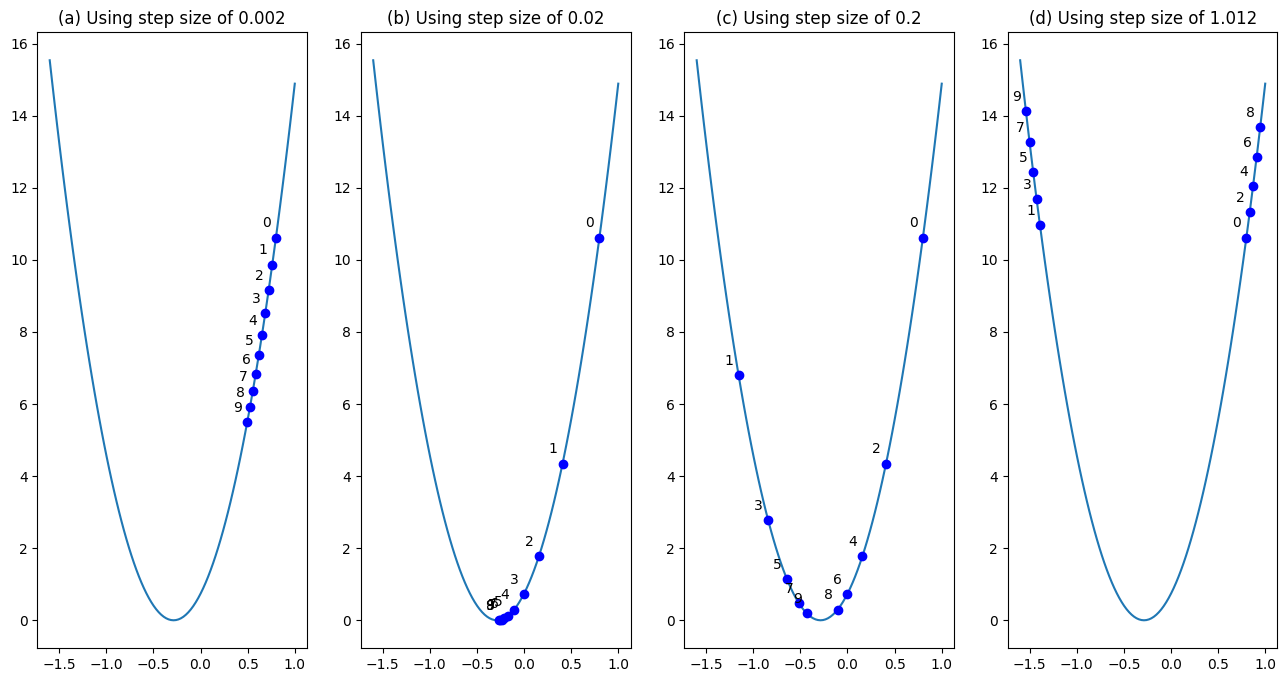

In [2]:
from matplotlib import pyplot as plt
import numpy as np

def gradient_descent(step_size=.1):
	plt.plot(np.linspace(-1.6, 1, 100), loss(np.linspace(-1.6, 1, 100)))
	current_x = .8
	for iteration in range(10):
		plt.plot([current_x], [loss(current_x)], 'ob')
		plt.text(current_x - .1, loss(current_x) + .2, str(iteration), ha='center', va='bottom')
		gradient = (loss(current_x + 0.000001) - loss(current_x)) / 0.000001
		current_x -= gradient * step_size

plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.title('(a) Using step size of 0.002')
gradient_descent(0.002)
plt.subplot(1, 4, 2)
plt.title('(b) Using step size of 0.02')
gradient_descent(0.02)
plt.subplot(1, 4, 3)
plt.title('(c) Using step size of 0.2')
gradient_descent(0.1)
plt.subplot(1, 4, 4)
plt.title('(d) Using step size of 1.012')
gradient_descent(0.112)

We can observe 4 different scenarios here:
* a) This step size is too small, so we would need too many iterations to eventually reach the optimum. After 10 iterations, we're still at $5$,  but we're trying to reach $0$.
* b) This step size is pretty good. After very few iterations, we already reach the optimum.
* c) Because of the step size being too large, we're bouncing around the curve, passing the optimum on every iteration. We will eventualy reach it, but it will require too many iterations because of this.
* d) In this case, the step size is so large that with every iteration we're further from the optimum. This numerical unstability ends up with an infinite loss.

There are a few tricks to find the right loss, but they are mostly heuristic, and most complex models end up trying a few different values and seeing what works better empirically. By working with neural network and different kind of layers, you'll little by little develop an intuition about this, in the same way that you need some time in a new country to know what's too cheap or too expensive.

Let's see now about the iteration parameter.

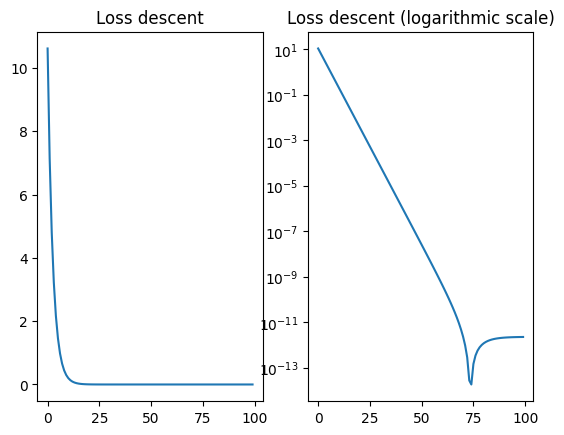

In [3]:
losses = []
current_x = .8
step_size = 0.01
for iteration in range(100):
	losses.append(loss(current_x))
	gradient = (loss(current_x + 0.000001) - loss(current_x)) / 0.000001
	current_x -= gradient * step_size

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss descent')
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Loss descent (logarithmic scale)')
plt.yscale('log');

You can see how most of the optimization is done in the first 10 iterations because the initial choosing of $x$ is pretty far from the optimal. However, when we turn the log scale on, we can see how we're actually optimizing for way more steps.

That weird loss behaviour at the end happens because of they way we are computing the derivatives. If you remember the [derivatives notebook](./001+Derivatives.ipynb), we were computing it using the limit when $h$ tends to zero. However, since we can't use an infinitely small numbrer, we have manually set $h$ previously to $0.000001$. Let's see what happens when we repeat the previous code just adding a few more zeros to this number:

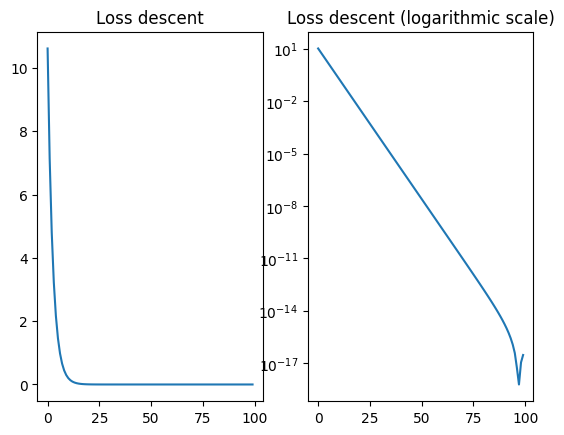

In [4]:
losses = []
current_x = .8
step_size = 0.01
for iteration in range(100):
	losses.append(loss(current_x))
	gradient = (loss(current_x + 0.00000001) - loss(current_x)) / 0.00000001
	current_x -= gradient * step_size

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss descent')
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Loss descent (logarithmic scale)')
plt.yscale('log');

You can see that now we are optimizing for a bunch more iterations, but eventually we'll always reach this rounding problem. If this is happening with just one variable, imagine how much it would happen with more.